In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

In [2]:
test_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

test_df.shape

(334, 22)

In [3]:
train_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/train.csv')

train_df.shape

(2999, 22)

In [4]:
test_df = test_df.drop(columns=['Unnamed: 0'])
train_df = train_df.drop(columns=['Unnamed: 0'])

In [5]:
X = train_df.drop(['churn'], axis = 1)
y = train_df['churn']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [7]:
# numeric columns + drop phone #
X_tr_num = X_train.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)
X_tr_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
93,142,0,140.8,140,23.94,228.6,119,19.43,152.9,88,6.88,10.9,7,2.94,1
419,135,0,201.8,81,34.31,225.0,114,19.13,204.4,82,9.20,10.3,6,2.78,1
2907,134,32,216.8,78,36.86,102.2,111,8.69,174.0,83,7.83,8.6,2,2.32,0
2525,103,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6
2592,92,29,201.3,130,34.22,203.7,115,17.31,129.9,113,5.85,6.4,6,1.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,65,29,158.1,104,26.88,322.2,81,27.39,210.0,96,9.45,8.9,6,2.40,1
683,55,25,165.6,123,28.15,136.1,95,11.57,175.7,90,7.91,11.0,2,2.97,3
2688,103,0,246.5,47,41.91,195.5,84,16.62,200.5,96,9.02,11.7,4,3.16,1
2687,80,0,189.1,122,32.15,223.2,92,18.97,269.0,116,12.11,13.9,3,3.75,2


In [8]:
# doing the same for X test
X_te_num = X_test.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)

In [9]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# without smote better here

steps = [('std_scaler', StandardScaler()),
        ('rf_clf', RandomForestClassifier(random_state=42))]

pipeline = Pipeline(steps)


pipeline

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf_clf', RandomForestClassifier(random_state=42))])

In [10]:
pipe_grid = {
    'rf_clf__n_estimators': [25, 50, 100, 150],
    'rf_clf__max_features': ['sqrt', 'log2', None],
    'rf_clf__max_depth': [3, 6, 9, None],
    'rf_clf__max_leaf_nodes': [3, 6, 9]}

gs_pipe = GridSearchCV(estimator = pipeline,
                      param_grid = pipe_grid)

In [11]:
gs_pipe.fit(X_tr_num, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rf_clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf_clf__max_depth': [3, 6, 9, None],
                         'rf_clf__max_features': ['sqrt', 'log2', None],
                         'rf_clf__max_leaf_nodes': [3, 6, 9],
                         'rf_clf__n_estimators': [25, 50, 100, 150]})

In [12]:
gs_pipe.best_score_

0.9123999010146002

In [13]:
gs_pipe.best_params_

{'rf_clf__max_depth': 6,
 'rf_clf__max_features': None,
 'rf_clf__max_leaf_nodes': 9,
 'rf_clf__n_estimators': 150}

In [40]:
co = gs_pipe.best_estimator_

In [14]:
# takes best estimators and puts in the variable called
best_model = gs_pipe.best_estimator_
best_model

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf_clf',
                 RandomForestClassifier(max_depth=6, max_features=None,
                                        max_leaf_nodes=9, n_estimators=150,
                                        random_state=42))])

In [15]:
y_pred = best_model.predict(X_te_num)

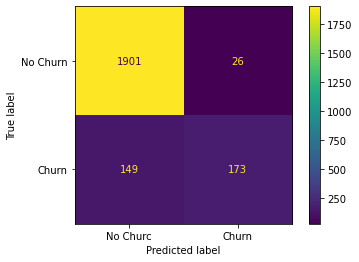

In [99]:
fig, ax = plt.subplots()

fig = plot_confusion_matrix(best_model,X_tr_num,y_train, ax =ax)
ax.xaxis.set_ticklabels(['No Churc', 'Churn']); ax.yaxis.set_ticklabels(['No Churn', 'Churn']);

In [100]:
from sklearn.metrics import recall_score
recall_score(y_test ,y_pred, average='macro')

0.762287988923503

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       642
        True       0.88      0.54      0.67       108

    accuracy                           0.92       750
   macro avg       0.90      0.76      0.81       750
weighted avg       0.92      0.92      0.91       750



In [18]:
best_model.fit(X_tr_num, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf_clf',
                 RandomForestClassifier(max_depth=6, max_features=None,
                                        max_leaf_nodes=9, n_estimators=150,
                                        random_state=42))])

In [19]:
print(best_model.score(X_tr_num, y_train))

0.9221876389506447


In [20]:
print(best_model.score(X_te_num, y_test))

0.9226666666666666


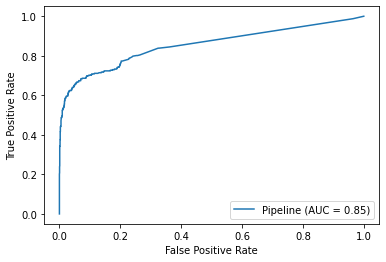

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
plot_roc_curve(best_model,X_tr_num,y_train)

In [63]:
# no coef_ with random forest, its feature importances

co = best_model.steps[1][1].feature_importances_

In [64]:
name = X_tr_num.columns

In [76]:
co = list(co)
co

[0.00026975506445076796,
 0.1178346992055266,
 0.23908465176203658,
 0.0,
 0.2440821399182749,
 0.08920398810127429,
 0.0,
 0.09620613330784217,
 0.002386614994520551,
 0.0007558721536219264,
 0.002518342496949823,
 0.0015685827672915413,
 0.0011179225787958094,
 0.001951881355023135,
 0.20301941629439185]

In [79]:
names = pd.DataFrame({'Names' : name,
                                'Feature_Importance' : co})

In [111]:
top=names.sort_values('Feature_Importance',ascending = False)
top

,Names,Feature_Importance
4,total day charge,0.244082
2,total day minutes,0.239085
14,customer service calls,0.203019
1,number vmail messages,0.117835
7,total eve charge,0.096206
5,total eve minutes,0.089204
10,total night charge,0.002518
8,total night minutes,0.002387
13,total intl charge,0.001952
11,total intl minutes,0.001569


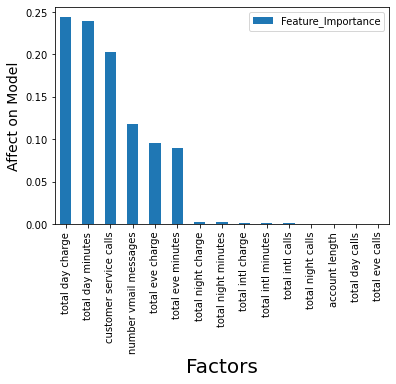

In [117]:
top.plot(x='Names', y='Feature_Importance', kind='bar')
plt.xlabel('Factors', fontsize=20)
plt.ylabel('Affect on Model', fontsize=14)
plt.show()

In [105]:
X_tr_num.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
93,142,0,140.8,140,23.94,228.6,119,19.43,152.9,88,6.88,10.9,7,2.94,1
419,135,0,201.8,81,34.31,225.0,114,19.13,204.4,82,9.20,10.3,6,2.78,1
2907,134,32,216.8,78,36.86,102.2,111,8.69,174.0,83,7.83,8.6,2,2.32,0
2525,103,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6
2592,92,29,201.3,130,34.22,203.7,115,17.31,129.9,113,5.85,6.4,6,1.73,1
